In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
import networkx as nx
from flow_computation import flow_computation

In [2]:
## Load necessary data
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))
paths = pickle.load(open('data/final_paths.p', "rb"))

In [3]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

## Plot network flow within data set

We want to use the flow value for each path to compute the flow value for each link using paths now

In [4]:
flows = flow_computation(df_ivs, 100000, path_lengths)

In [5]:
df_links = nx.to_pandas_edgelist(G)

In [6]:
def plot_context(G, flows, attribute_name, scale_factor):

    df_links[attribute_name] = 0
    for key, flow in flows.items():
        route = paths[key]
        passed_links = [route[i:(i + 2)] for i in range(len(route) - 1)]
        for link in passed_links:
            df_links.loc[(df_links.source.isin(link)) & (df_links.target.isin(link)), attribute_name] += flow
    flow_values_edges = dict(zip(tuple(zip(df_links.source, df_links.target)), df_links[attribute_name]))
    nx.set_edge_attributes(G, flow_values_edges, attribute_name)

    fig, ax = plt.subplots(dpi=200)


    widths = nx.get_edge_attributes(G, attribute_name)
    scale_factor = scale_factor
    scaled_widths = {i:(widths[i]/scale_factor) for i in widths.keys()}

    nx.draw_networkx_nodes(G,pos_dict,
                           nodelist=harbour_nodes,
                           node_size=30,
                           node_color='r',
                           alpha=1)

    nx.draw_networkx_edges(G,pos_dict,
                           edgelist = scaled_widths.keys(),
                           width=list(scaled_widths.values()),
                           # edge_color='blue',
                           alpha=1)

    # nx.draw_networkx_labels(G, pos=pos_dict,
    #                         labels=dict(zip(nodelist,nodelist)),
    #                         font_color='white')
    plt.box(False)
    img = plt.imread("data/NL_map.png")
    x1, x2, y1, y2 = 3.566619, 6.944693, 50.860830, 53.444274
    z = 0.53
    ax.imshow(img, extent=[x1-z, x2+z, y1-z+0.3, y2+z-0.3])
    plt.show()
    return widths

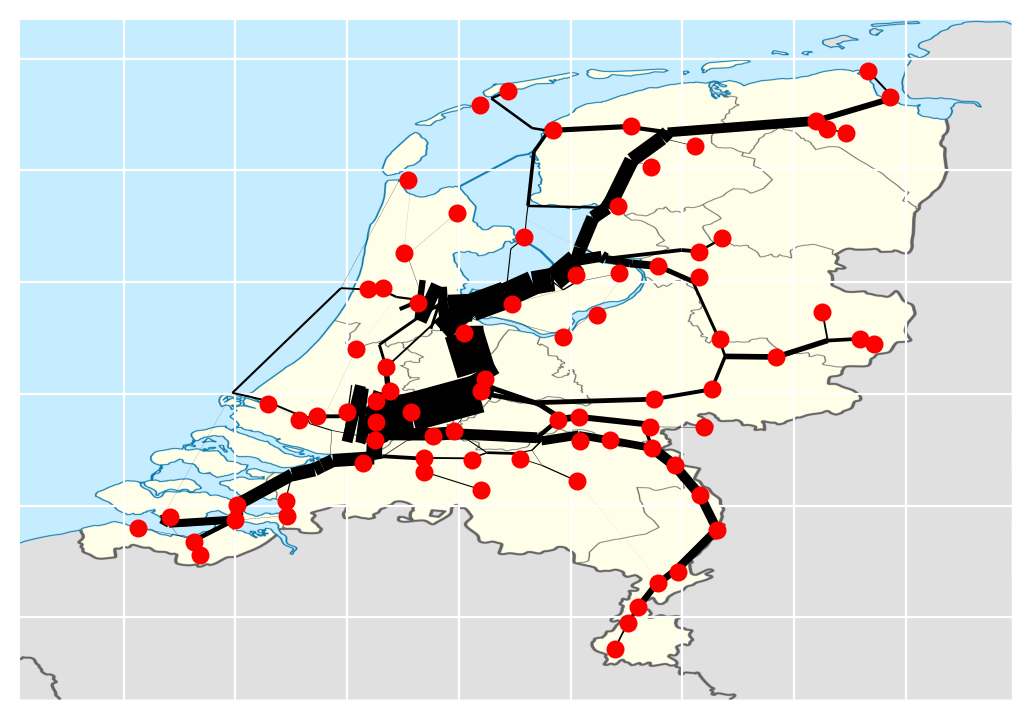

In [7]:
widths0 = plot_context(G, flows, 'passing_flow', 50000)

In [8]:
df_links = nx.to_pandas_edgelist(G)

In [9]:
flows = flow_computation(df_ivs, 100000, path_lengths, False)

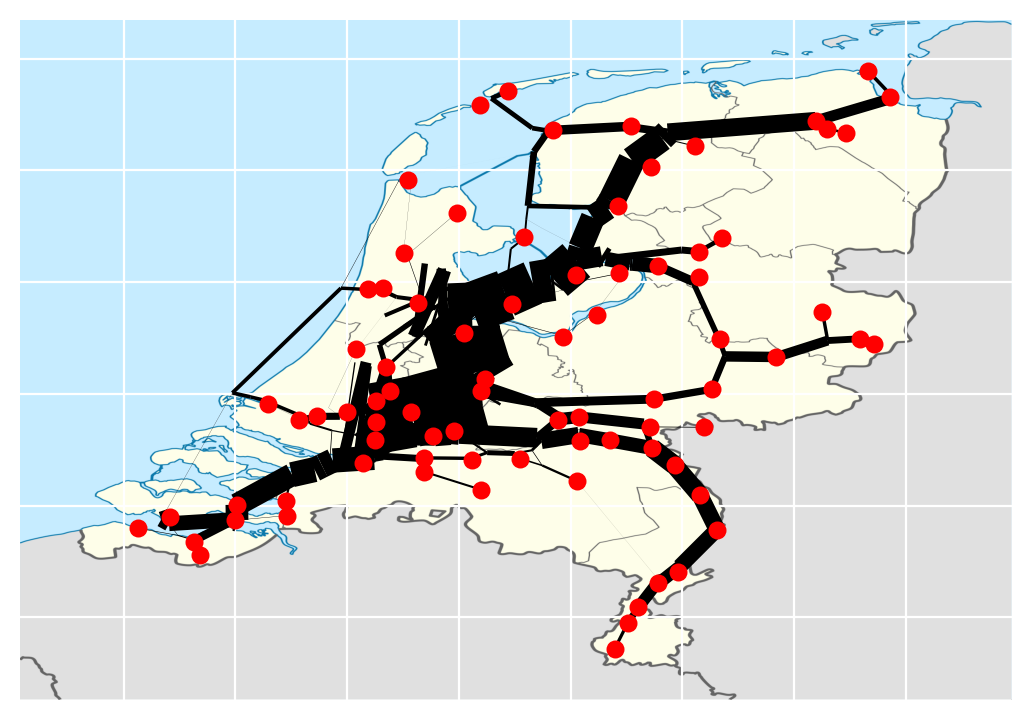

In [10]:
widths2 = plot_context(G, flows, 'passing_flow', 50000)

In [ ]:
## Why does using non-individual speeds lead to different results?

In [11]:
ship_data = pd.read_excel('data/ship_types.xlsx')

## Plot captured flow

## 60000

In [8]:
# r, p, c, x_m,  additional_nodes=0, vis=False, o=24, random_data=False, load=1, seed=None

Optimal


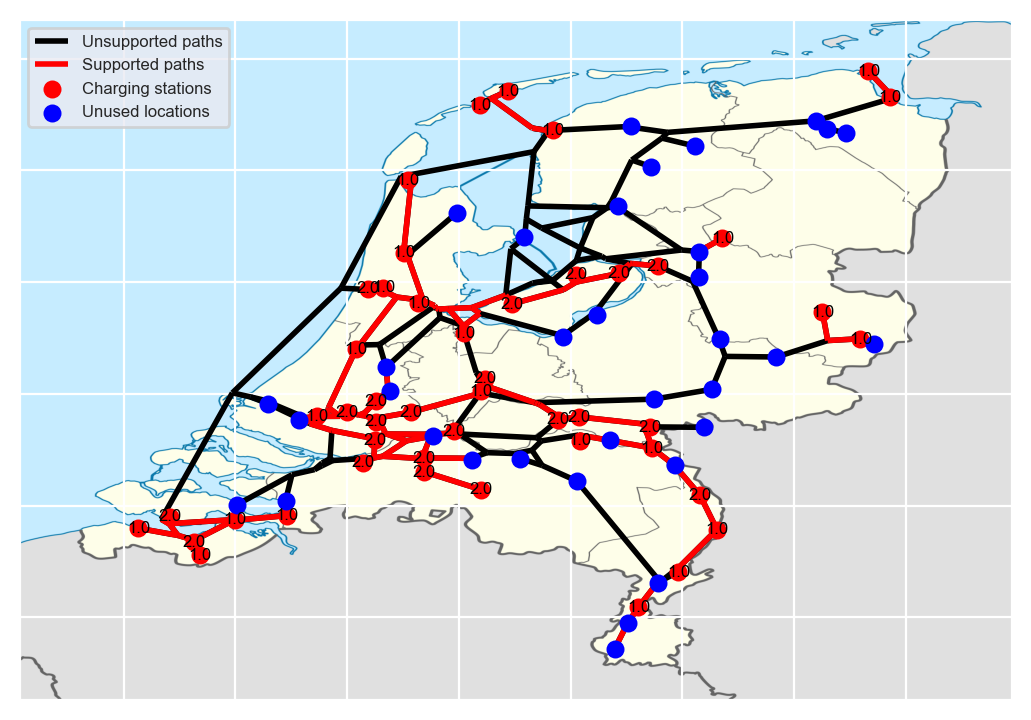

In [9]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(60000, 100, 1000, 2, vis=True)

In [10]:
captured_flows = {i:sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}

In [11]:
captured_flows = {i:j*flows[i] for i,j in captured_flows.items()}

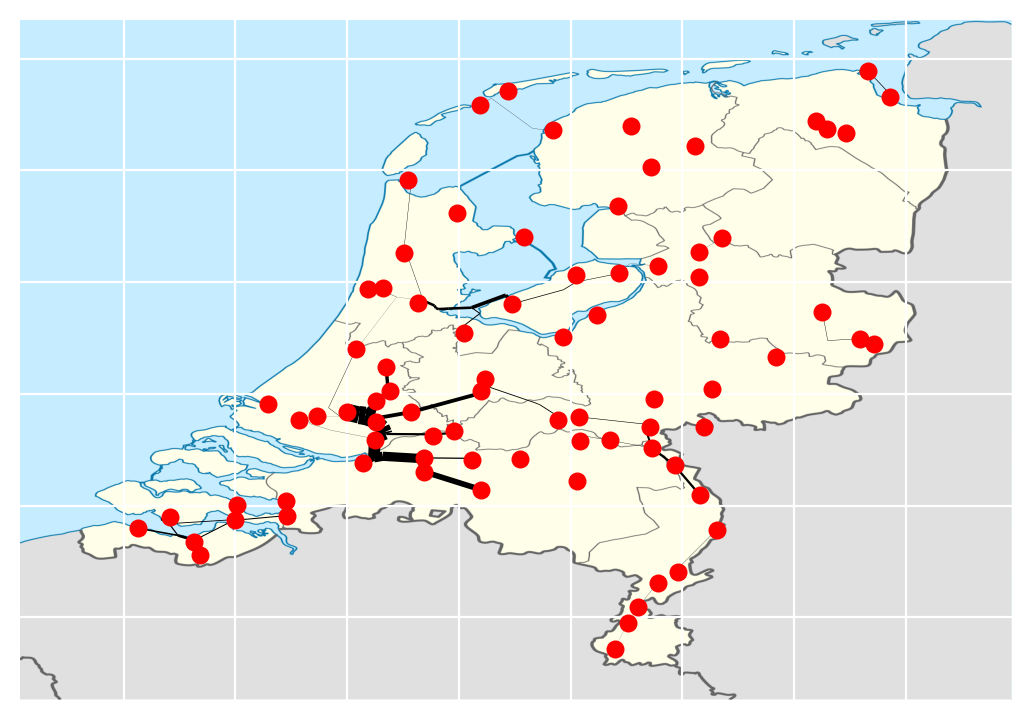

In [12]:
widths1 = plot_context(G, captured_flows, 'captured_flow', 10000)

## 90000

Optimal


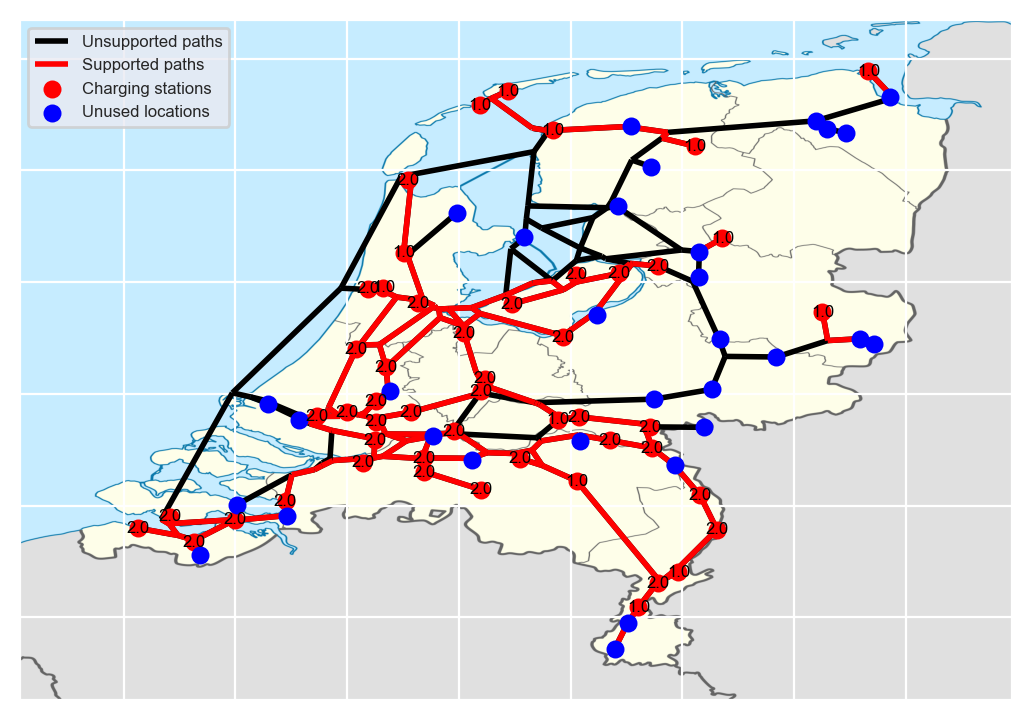

In [13]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(90000, 100, 1000, 2, vis=True)

In [14]:
fraction_captured_total

0.1435889815716439

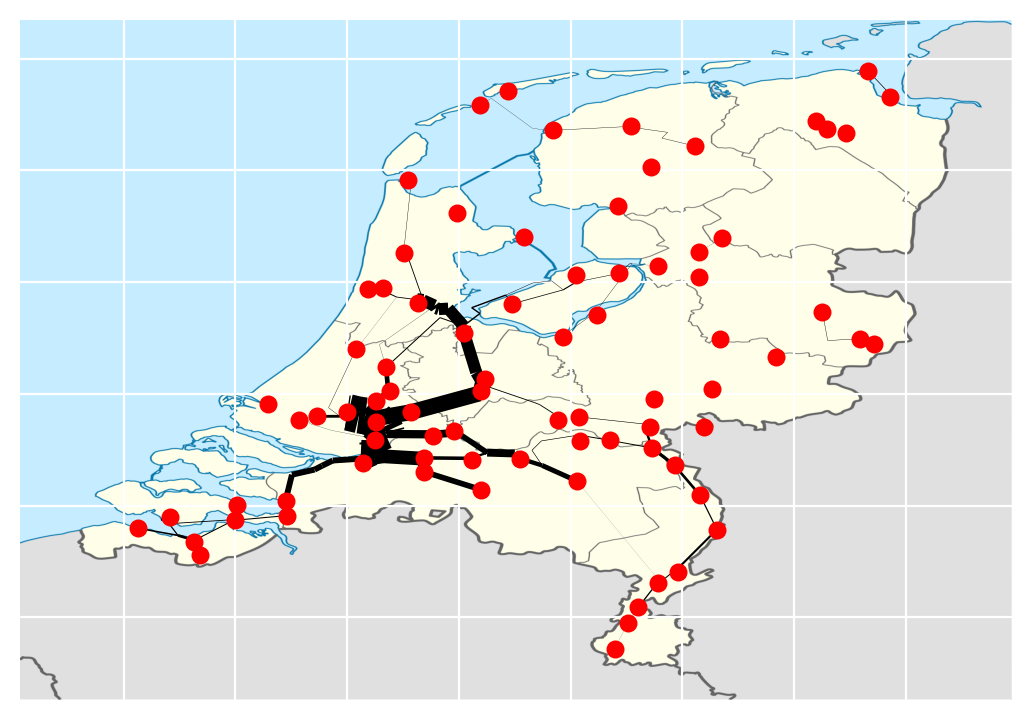

In [15]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths2 = plot_context(G, captured_flows, 'captured_flow', 10000)

## 120000

Optimal


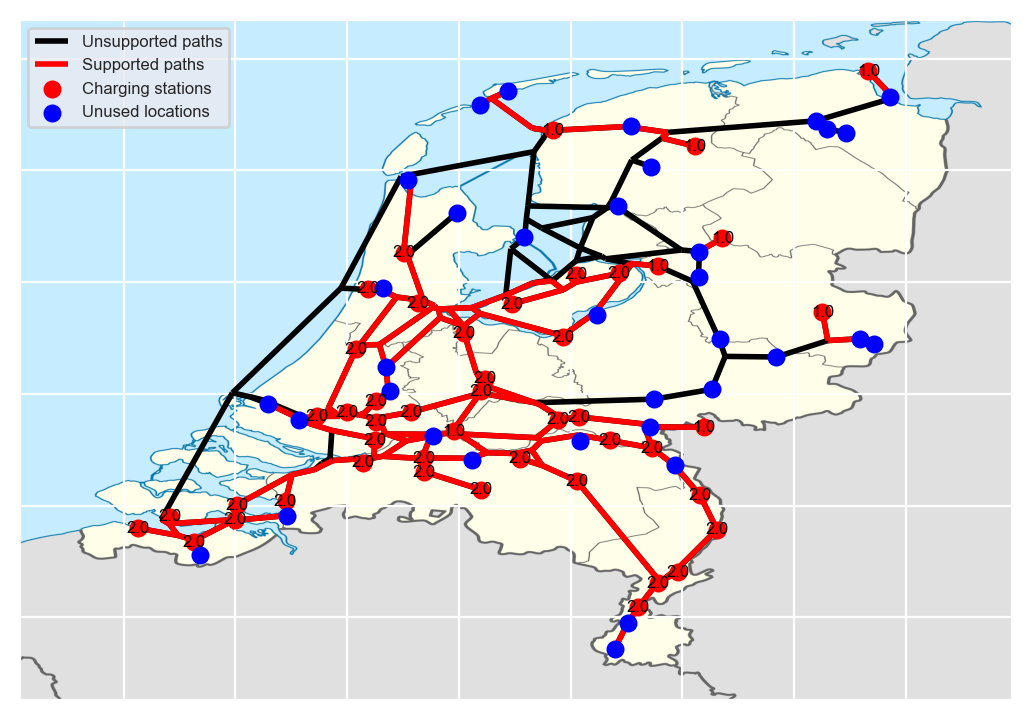

In [16]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(120000, 100, 1000, 2, vis=True)

In [17]:
fraction_captured_total

0.26030919755822673

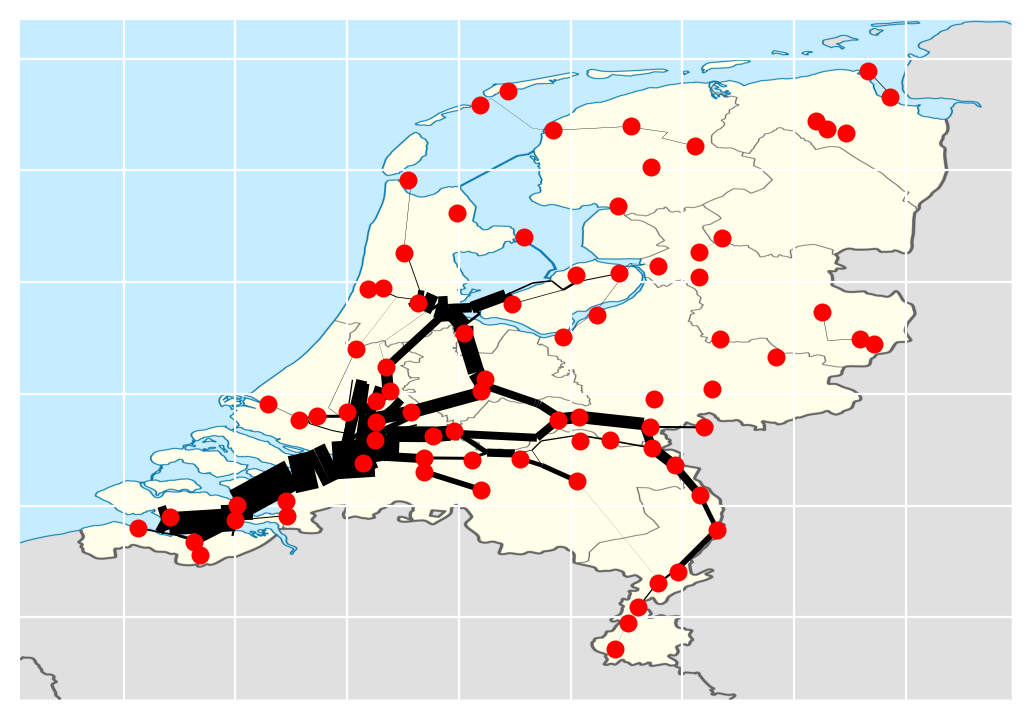

In [18]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths2 = plot_context(G, captured_flows, 'captured_flow', 10000)

## 150000

Optimal


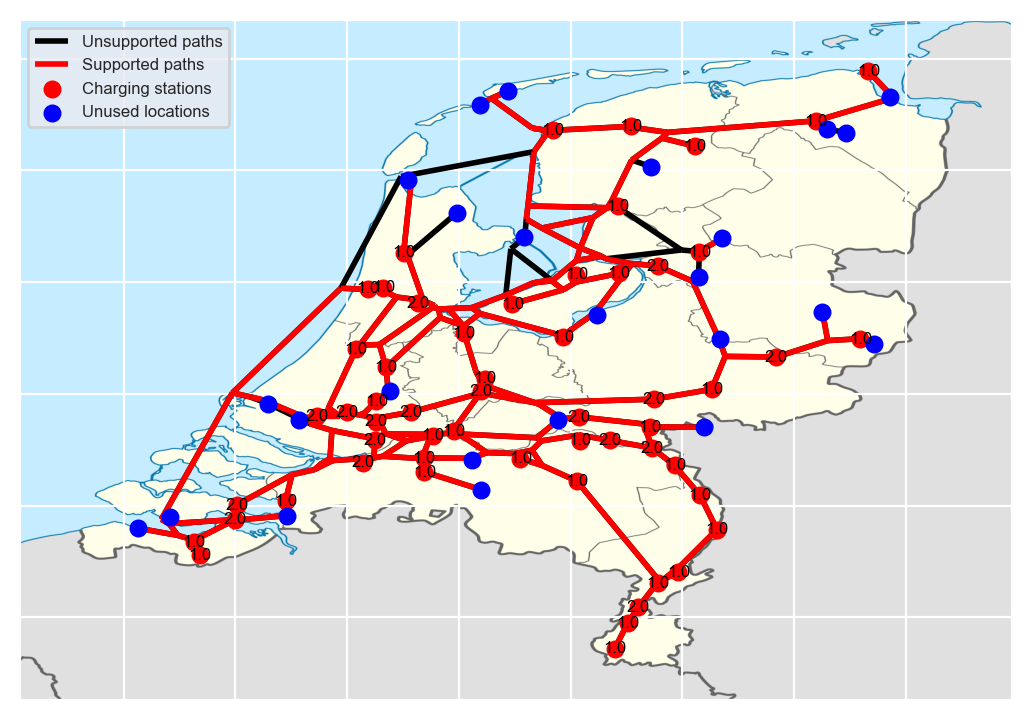

In [19]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(150000, 100, 1000, 2, vis=True)

In [20]:
fraction_captured_total

0.5205530586777067

In [21]:
serviceable_fraction

0.7462155186888303

In [22]:
max_flow

878099.019940552

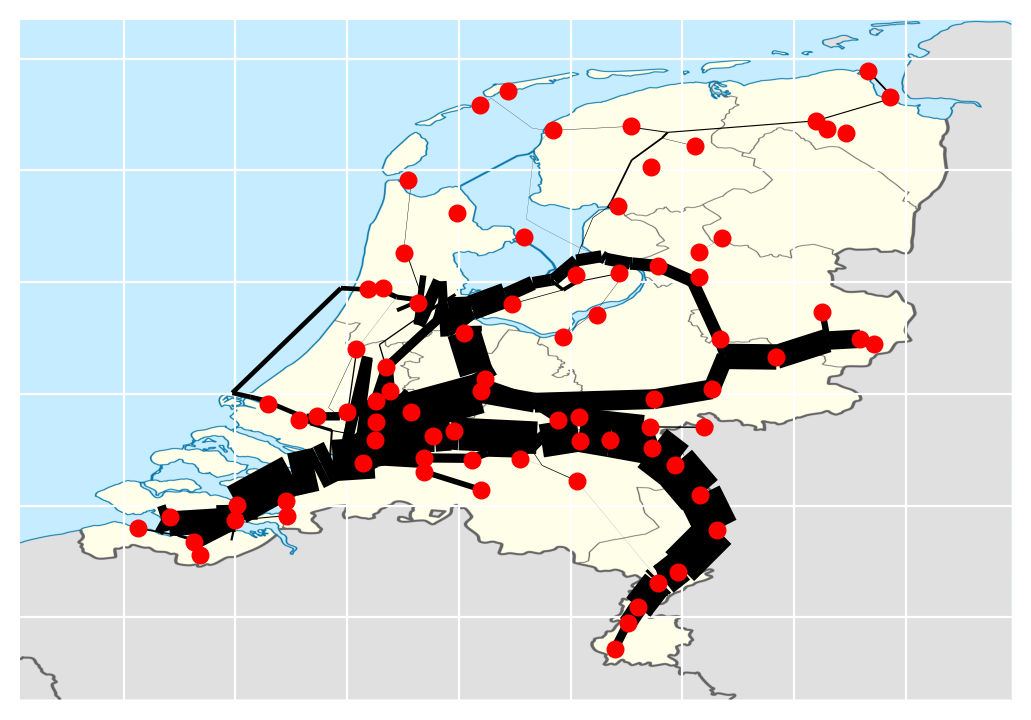

In [23]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths2 = plot_context(G, captured_flows, 'captured_flow', 10000)